In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import networkx as nx

v1 + v2 = [3 3]
Dot product = 4
Norm of v1 = 2.23606797749979


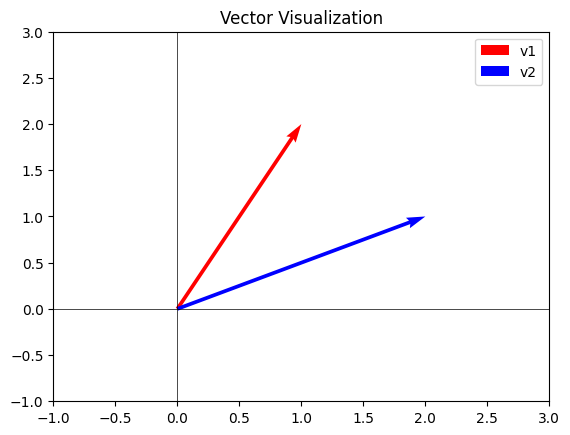

In [ ]:
"""
====================================================
📘 Math & Probability Learning Script with Visuals
====================================================
"""

# ====================================================
# 🔹 1. Vectors & Matrices
# ====================================================
"""
Steps:
1. Import NumPy (done above).
2. Define vectors and matrices as arrays.
3. Perform operations: addition, dot product, transpose.
4. Visualize vectors on 2D plane.
"""

# Vectors
v1 = np.array([1, 2])
v2 = np.array([2, 1])

print("v1 + v2 =", v1 + v2)
print("Dot product =", np.dot(v1, v2))
print("Norm of v1 =", np.linalg.norm(v1))

# Plot vectors
plt.figure()
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Vector Visualization")
plt.show()


Eigenvalues: [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


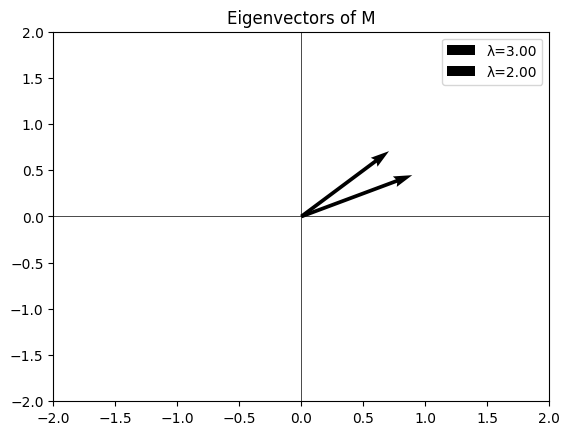

In [ ]:
# ====================================================
# 🔹 2. Eigenvalues & Eigenvectors
# ====================================================
"""
Steps:
1. Define a square matrix.
2. Use numpy.linalg.eig to compute eigenvalues/eigenvectors.
3. Visualize eigenvectors as arrows.
"""

M = np.array([[4, -2],
              [1,  1]])

eigenvalues, eigenvectors = np.linalg.eig(M)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Plot eigenvectors
plt.figure()
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i].real
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
               label=f'λ={eigenvalues[i]:.2f}')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.title("Eigenvectors of M")
plt.show()


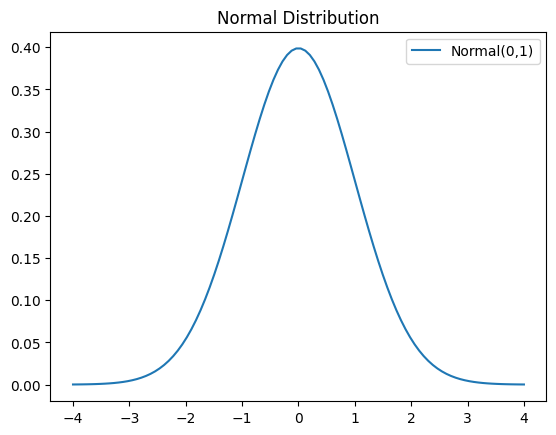

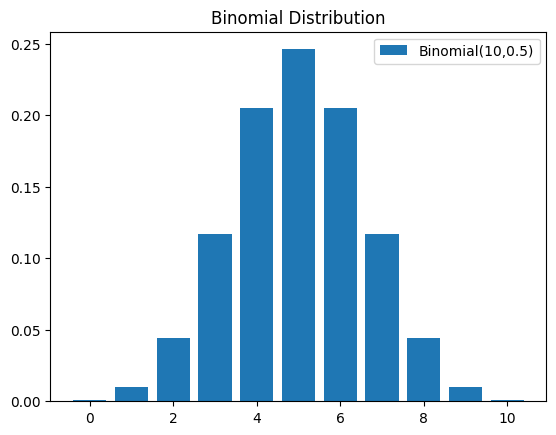

In [ ]:
# ====================================================
# 🔹 3. Probability Distributions
# ====================================================
"""
Steps:
1. Use scipy.stats for common distributions.
2. Visualize PDF/PMF for Normal and Binomial distributions.
"""

# Normal distribution
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1)

plt.figure()
plt.plot(x, y, label="Normal(0,1)")
plt.title("Normal Distribution")
plt.legend()
plt.show()

# Binomial distribution
n, p = 10, 0.5
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure()
plt.bar(x, y, label="Binomial(10,0.5)")
plt.title("Binomial Distribution")
plt.legend()
plt.show()


Probability of having the disease given a positive test: 0.16666666666666669


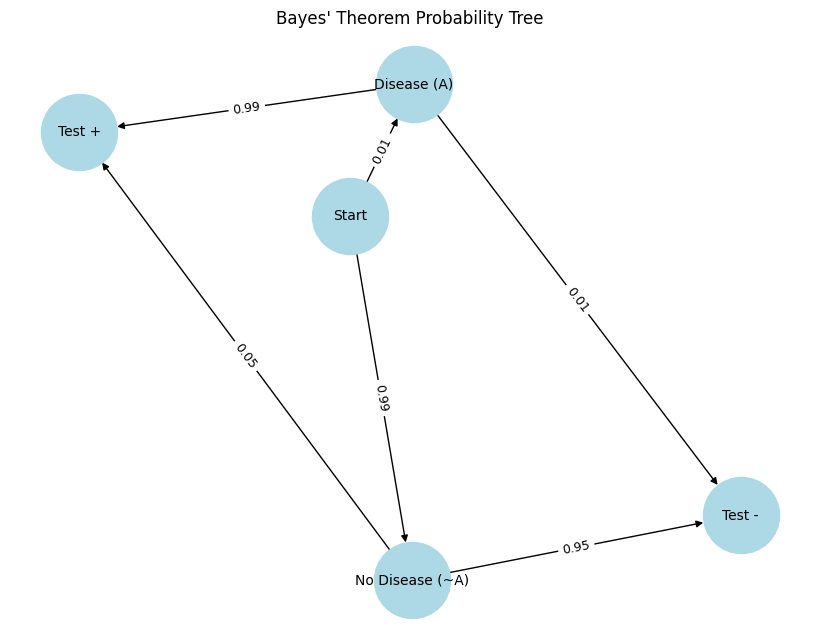

In [ ]:
# ====================================================
# 🔹 4. Bayes’ Theorem
# ====================================================
"""
Formula:
    P(A|B) = [ P(B|A) * P(A) ] / P(B)

Steps:
1. Define prior probability P(A), P(~A).
2. Define likelihoods P(B|A), P(B|~A).
3. Compute marginal probability P(B).
4. Apply Bayes' formula.
"""

# Probabilities
P_A = 0.01        # Probability of disease
P_notA = 1 - P_A
P_B_given_A = 0.99       # Positive test if diseased
P_B_given_notA = 0.05    # False positive rate

# Total probability of positive test
P_B = P_B_given_A * P_A + P_B_given_notA * P_notA

# Posterior probability
P_A_given_B = (P_B_given_A * P_A) / P_B

print("Probability of having the disease given a positive test:", P_A_given_B)

# Visualize as probability tree
G = nx.DiGraph()
G.add_edge("Start", "Disease (A)", prob=P_A)
G.add_edge("Start", "No Disease (~A)", prob=P_notA)
G.add_edge("Disease (A)", "Test +", prob=P_B_given_A)
G.add_edge("Disease (A)", "Test -", prob=1-P_B_given_A)
G.add_edge("No Disease (~A)", "Test +", prob=P_B_given_notA)
G.add_edge("No Disease (~A)", "Test -", prob=1-P_B_given_notA)

pos = nx.spring_layout(G, seed=42)
edge_labels = {(u, v): f"{d['prob']:.2f}" for u, v, d in G.edges(data=True)}

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Bayes' Theorem Probability Tree")
plt.show()


# ===========================================
# 🔹 5. Quantum particle NOT a point but a **probability distribution**
# ===========================================
The snippet below shows the essence of quantum mechanics where a particle is not a dot but a wave packet. It has a fuzzy position (sigma_x) and a preferred motion (p0). When this particle/wave packet is measured we don’t get the wave itself but a probability of finding it at different spots.

/tmp/ipython-input-1537105312.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi_x /= np.sqrt(np.trapz(np.abs(psi_x)**2, x))  # normalize


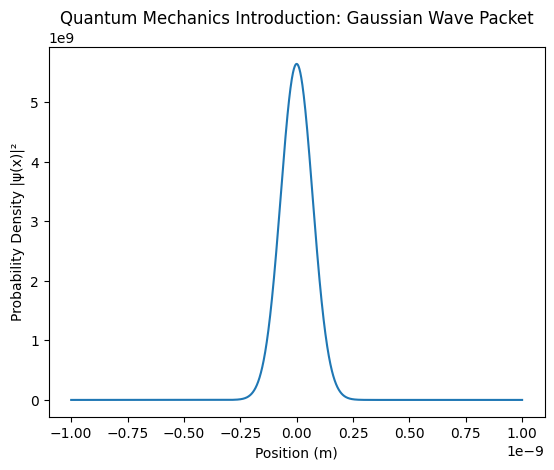

In [ ]:
# ==================================================================
# 🔹 5. Quantum particle not a point but a probability distribution
# ==================================================================

"""
Explanation:
A wave packet is modeled as a Gaussian wave in position space.
- sigma_x controls the spread in position.
- p0 adds an average momentum to the wave.
- psi_x is normalized so that the total probability integrates to 1.
- plot |ψ(x)|², which gives the probability of finding the particle at position x.
"""
# Planks constant
h = 6.626e-34
# reduced Planks constant
hbar = h / (2*np.pi)

# spatial grid
x = np.linspace(-1e-9, 1e-9, 2000)
# width of the packet in position i.e., uncertainty in x.
sigma_x = 1e-10
# movement of packet in a direction i.e., momentum
p0 = 5e-24

# wavefunction in position space
psi_x = np.exp(-(x**2)/(2*sigma_x**2)) * np.exp(1j * p0 * x / hbar)
# normalization to obey certinity principles
psi_x /= np.sqrt(np.trapz(np.abs(psi_x)**2, x))

plt.plot(x, np.abs(psi_x)**2)
plt.title("Quantum Mechanics Introduction: Gaussian Wave Packet")
plt.xlabel("Position (m)")
plt.ylabel("Probability Density |ψ(x)|²")
plt.show()

# ================================================
# 🔹 6. Quantum particle is Equal Super position
# ================================================

In the classical world, things are definite like a switch can be either ON or OFF or in classical computers a bit could be either 0 or 1.

In the quantum world, things can be a mix of possibilities when thay are not observed. A qubit is in many states when not observded, but measurement forces a choice. The outcome is random but the odds are determined by the mix of α and β. Its just like flipping a coin, it’s not really heads or tails when not looked at --- it’s both at once ___ **A Quantum State.**

When we look at the coin, we see either heads or tails, with probabilities that depend on the **superposition**.

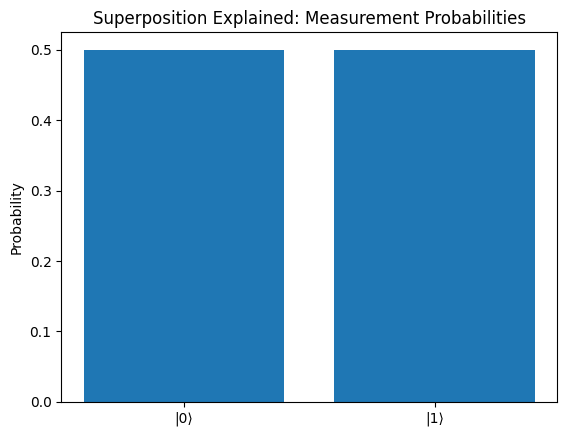

In [ ]:
# ==================================================================
# 🔹 6. Quantum particle is Equal Super position
# ==================================================================

"""
Explanation:
A qubit psi is in equal superposition where alpha is equal to beta
The factor 1/2, 1/2 ensures that the total probability adds up to 1.
Equal superposition means:
- 50% chance of measuring 0
- 50% chance of measuring 1.
"""

# Basis states
state_0 = np.array([1, 0])
state_1 = np.array([0, 1])

# Superposition: α|0⟩ + β|1⟩
# in equal superposition
alpha, beta = 1/np.sqrt(2), 1/np.sqrt(2)
# alpha amplitude of state ket zero, beta is amplitude of state ket one
psi = alpha*state_0 + beta*state_1

# Probabilities of measuring 0 or 1
# probability is square of amplitude
p0 = np.abs(np.vdot(state_0, psi))**2
p1 = np.abs(np.vdot(state_1, psi))**2

# plot
plt.bar(["|0⟩", "|1⟩"], [p0, p1])
plt.title("Superposition Explained: Measurement Probabilities")
plt.ylabel("Probability")
plt.show()

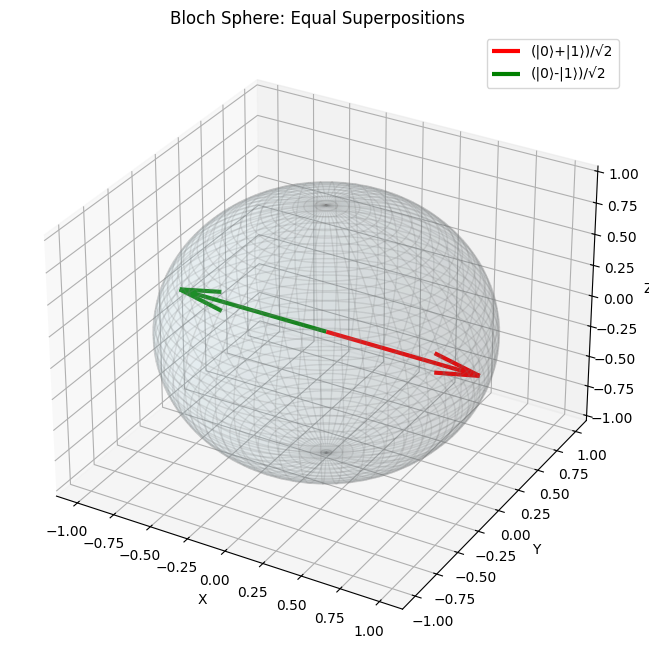

In [ ]:
# ==================================================================
# 🔹 7. Represetation of Quantum particle using Bloch Sphere
# ==================================================================

# Create a sphere (Bloch sphere surface)
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere surface
ax.plot_surface(x, y, z, color='lightblue', alpha=0.1, edgecolor='gray')

# Equal superposition |ψ+> = (|0> + |1>)/√2 -> +X direction
theta, phi = np.pi/2, 0
xp = np.sin(theta) * np.cos(phi)
yp = np.sin(theta) * np.sin(phi)
zp = np.cos(theta)
ax.quiver(0, 0, 0, xp, yp, zp, color="red", linewidth=3, label="(|0⟩+|1⟩)/√2")

# Opposite superposition |ψ-> = (|0> - |1>)/√2 -> -X direction
theta, phi = np.pi/2, np.pi
xm = np.sin(theta) * np.cos(phi)
ym = np.sin(theta) * np.sin(phi)
zm = np.cos(theta)
ax.quiver(0, 0, 0, xm, ym, zm, color="green", linewidth=3, label="(|0⟩-|1⟩)/√2")

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bloch Sphere: Equal Superpositions")

# Show legend
ax.legend()

plt.show()


# ==================================================
# 🔹 8. Maths behind the Quantum Gates ==================================================

# **1. Tensor Product**

The **tensor product** is a way to combine two vectors or matrices into a bigger one. In Quantum, a single qubit is represented by a 2D vector like
$$
|0\rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

$$
|1\rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$
For two qubits, we don’t put the vectors side by side but we take their tensor product. in short **Tensor products** let us build multi-qubit states and apply gates to specific qubits


A **4D vector** that represents the joint system is

$$
|0\rangle \otimes |1\rangle \;=\; |01\rangle
\;=\;
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\otimes
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\;=\;
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
$$

# **2. Inner Product**

The **inner product** is like a dot product between two vectors.In Quantum it tells us how similar two quantum states are. The square of the inner product gives the probability of one state collapsing into another when measured. Prcisely, when we measure a qubit in some basis, we are essentially computing an **inner product** between the state and that basis vector.

Example:

 - $ \langle 0 | 0 \rangle = 1 \quad (\text{they’re the same state}) $  
 - $ \langle 0 | 1 \rangle = 0 \quad (\text{they’re orthogonal → totally different}) $

# **3. Outer Product**

The **outer product** takes a column vector ∣ψ⟩ and a row vector ⟨φ∣ to form a matrix. In Quantum context outer products are used to form operators like gates. Many quantum gates can be expressed as sums of outer products.

$$
|0\rangle \langle 0|
=
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
\begin{bmatrix} 1 & 0 \end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
$$
	​
Example: Hadamard Gate

$$
H \;=\; \tfrac{1}{\sqrt{2}}
\Big(
\,|0\rangle\langle 0|
+ |0\rangle\langle 1|
+ |1\rangle\langle 0|
- |1\rangle\langle 1|
\Big)
$$

Which is equivalent to the **matrix form**:

$$
H \;=\; \tfrac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

# **4. Unitary Matrices**

A **unitary matrix** 𝑈 is one that satisfies:

$$
U^\dagger U = I
$$

Unitary matrices represent quantum gates because they preserve length of state vectors (probability must always add up to 1). and they are reversible (every quantum gate has an inverse).

Examples of unitary gates are X, Y, Z (Pauli matrices), Hadamard (H) and Rotation gates (Rx, Ry, Rz). Every valid quantum gate must be unitary ensuring quantum evolution is deterministic until measured.

In [ ]:
# ============================================
# 🔹 9. Classical Gates and Quantum Gates
# ============================================

"""
Explanation:
Classical Gates:
NOT: flips 0 to 1, 1 to 0.
AND: outputs 1 only if both inputs are 1.
OR: outputs 1 if either input is 1.
Quantum Gates:
X: quantum NOT (flips |0⟩ ↔ |1⟩).
Y: rotates state in the complex plane.
Z: flips the sign of |1⟩.
H: Hadamard Gate creates superpositions (e.g., |0⟩ → (|0⟩+|1⟩)/√2).
"""

# Classical gates
def classical_not(bit):
    return 1 - bit  # flips 0->1, 1->0

def classical_and(a, b):
    return a & b  # logical AND

def classical_or(a, b):
    return a | b  # logical OR

# Quantum gates (as matrices)
# Pauli-X (quantum NOT)
X = np.array([[0, 1],
              [1, 0]])
# Pauli-Y
Y = np.array([[0, -1j],
              [1j, 0]])
# Pauli-Z
Z = np.array([[1, 0],
              [0, -1]])
# Hadamard
H = (1/np.sqrt(2)) * np.array([[1, 1],
                                [1, -1]])

# Example states
ket0 = np.array([1, 0])  # |0>
ket1 = np.array([0, 1])  # |1>

# --- Classical examples ---
print("Classical NOT(0) =", classical_not(0))
print("Classical NOT(1) =", classical_not(1))
print("Classical AND(1,0) =", classical_and(1, 0))
print("Classical OR(1,0) =", classical_or(1, 0))

# --- Quantum examples ---
print("\nQuantum X|0> =", X @ ket0)
print("Quantum X|1> =", X @ ket1)

print("\nQuantum Y|0> =", Y @ ket0)
print("Quantum Z|0> =", Z @ ket0)

print("\nHadamard |0> =", H @ ket0)
print("Hadamard |1> =", H @ ket1)


Classical NOT(0) = 1
Classical NOT(1) = 0
Classical AND(1,0) = 0
Classical OR(1,0) = 1

Quantum X|0> = [0 1]
Quantum X|1> = [1 0]

Quantum Y|0> = [0.+0.j 0.+1.j]
Quantum Z|0> = [1 0]

Hadamard |0> = [0.70710678 0.70710678]
Hadamard |1> = [ 0.70710678 -0.70710678]


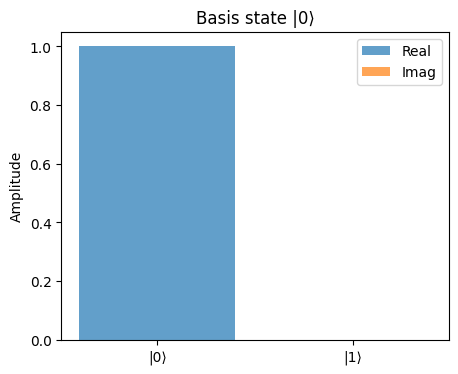

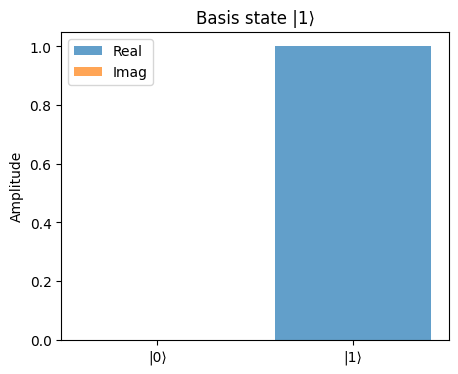

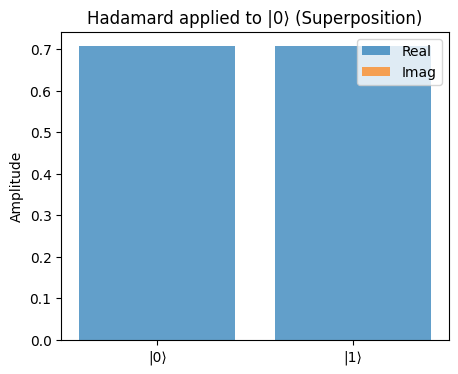

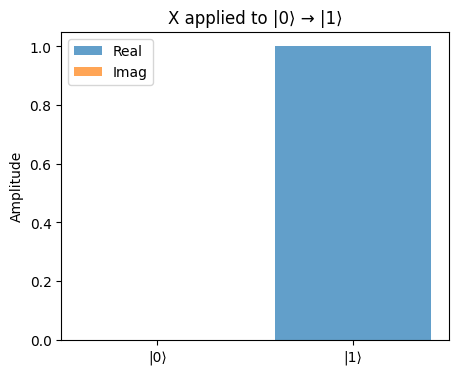

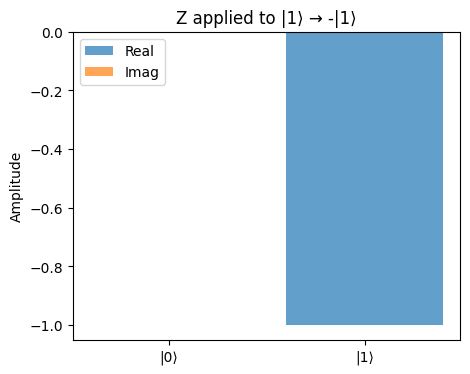

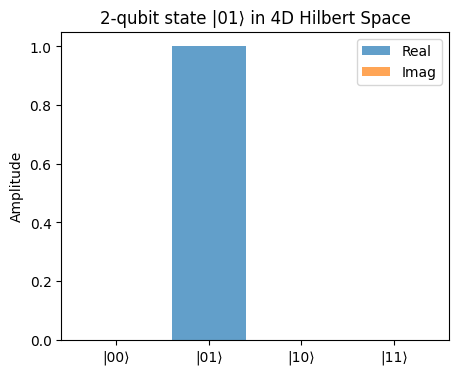

In [1]:
# ============================================
# 🔹 10. Bra-Ket Notation and Hilbert Space
# ============================================

"""
Explanation:
Bra-Ket Notation = quantum way of writing vectors and their inner/outer products.
Operators (unitary matrices) = rules that transform states.
Basis states = the “building blocks” (∣0⟩,∣1⟩).
Hilbert space = the full mathematical space where states live.
"""


# Basis States
# |0⟩
ket0 = np.array([[1], [0]])
# |1⟩
ket1 = np.array([[0], [1]])

# Pauli-X Gate (NOT gate flipt the state from |0⟩ to |1⟩ and vice versa)

X = np.array([[0, 1],
              [1, 0]])

# Pauli-Z Gate (phase flip, flips the sign of |1⟩)
Z = np.array([[1, 0],
              [0, -1]])

# Hadamard Gate (puts ∣0⟩ into an equal superposition)
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]])


# Applying Operators (Gates) to Basis State

state0 = ket0
state1 = ket1

# Hadamard creates superposition
# The @ operator -> matrix multiplication.
state_super = H @ ket0

# Visualization Helper
"""
    Plots the real and imaginary parts of a quantum state vector.
"""
# Plots the amplitudes of a quantum state.
# A state is represented as a column vector with complex numbers -> amplitudes.
# Bars show real part and imaginary part of each amplitude.

def plot_state_vector(state, title="Quantum State"):

    n = state.shape[0]
    x = np.arange(n)

    plt.figure(figsize=(5,4))
    plt.bar(x, state.real.flatten(), alpha=0.7, label="Real")
    plt.bar(x, state.imag.flatten(), alpha=0.7, label="Imag")
    plt.xticks(x, [f"|{i:0{int(np.log2(n))}b}⟩" for i in range(n)])
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize how each gate transforms the state vector.

plot_state_vector(state0, "Basis state |0⟩")
plot_state_vector(state1, "Basis state |1⟩")
plot_state_vector(state_super, "Hadamard applied to |0⟩ (Superposition)")
plot_state_vector(X @ ket0, "X applied to |0⟩ → |1⟩")
plot_state_vector(Z @ ket1, "Z applied to |1⟩ → -|1⟩")

# Hilbert Space Example (2-qubit tensor product)

tensor_state = np.kron(ket0, ket1)  # |0⟩⊗|1⟩ = |01⟩ A 4D vector
plot_state_vector(tensor_state, "2-qubit state |01⟩ in 4D Hilbert Space")


# ============================================
# 🔹 11. The Schrödinger Equation
# ============================================

The **Schrödinger Equation** is the master rule of quantum mechanics, just like Newton’s law  which is the rule of classical mechanics. Instead of telling where a particle is, it tells how the wavefunction ψ(x,t) changes with time.
The wavefunction is not a path like in classical mechanics — it’s a probability cloud that tells the likelihood of finding the particle in different places.

$$
i \hbar \frac{\partial}{\partial t}\,\psi(x,t) \;=\; \hat{H}\,\psi(x,t)
$$

- **ψ(x,t)** → the *wavefunction* (a probability cloud).
- **ħ** → reduced Planck’s constant, sets the quantum scale.
- **i** → imaginary unit, keeps the wave behavior.
- **Ĥ** → Hamiltonian (the total energy operator).

In simple words, **the way the probability cloud wiggles and evolves over time depends on the energy (kinetic and potential) of the system.** If there is no  free particle the wavefuction just spreads out like ripples. If there is a box or trap the wavefunction fits like standing wave, but if there is a barrier present, the wavefunction can sometimes *leak through*. This is like **quantum tunneling**. The wavefunction is just like a **musical note vibrating in space**. The **shape of the instrument (potential energy)** decides which notes (wavefunctions) exist.The Schrödinger Equation is like the **rulebook of harmony** that dictates which these notes evolve into which harmony.

Its different from classical physics, where partcile has a definite position and velocity. In Quantum physics, a particle is described by a wave of probabilities that evolves smoothly by the Schrödinger equation. You don’t know exactly where the particle is — only the probability of finding it when you measure.

Precisely, The Schrödinger Equation tells **how invisible probability waves of particles move, spread, and interact with energy landscapes.**


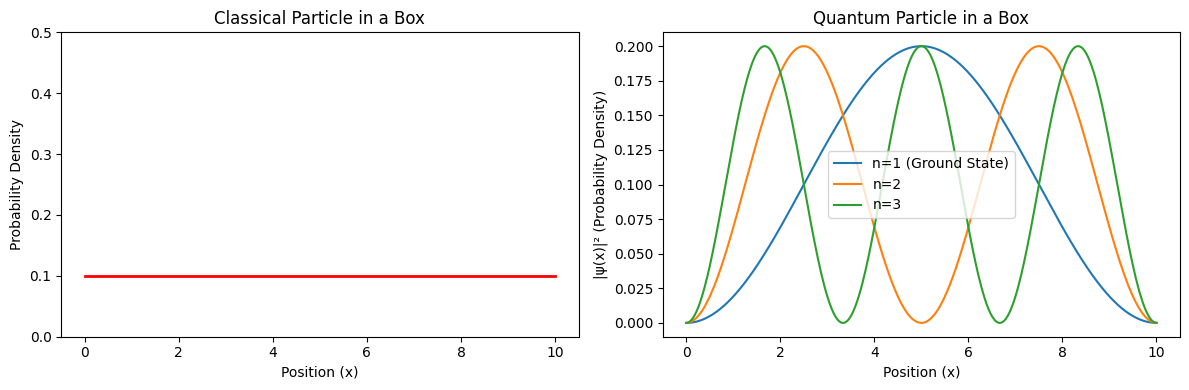

In [4]:
# Space (box from 0 to L)
L = 10
x = np.linspace(0, L, 500)

# Classical particle: constant probability everywhere
classical_prob = np.ones_like(x) / L

# Quantum particle: wavefunction in box (first 3 energy levels)
psi1 = np.sqrt(2/L) * np.sin(np.pi * x / L)
psi2 = np.sqrt(2/L) * np.sin(2*np.pi * x / L)
psi3 = np.sqrt(2/L) * np.sin(3*np.pi * x / L)

# Convert to probabilities (square of wavefunction)
prob1 = psi1**2
prob2 = psi2**2
prob3 = psi3**2

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Classical case
axs[0].plot(x, classical_prob, 'r', linewidth=2)
axs[0].set_title("Classical Particle in a Box")
axs[0].set_xlabel("Position (x)")
axs[0].set_ylabel("Probability Density")
axs[0].set_ylim(0, 0.5)

# Quantum case
axs[1].plot(x, prob1, label="n=1 (Ground State)")
axs[1].plot(x, prob2, label="n=2")
axs[1].plot(x, prob3, label="n=3")
axs[1].set_title("Quantum Particle in a Box")
axs[1].set_xlabel("Position (x)")
axs[1].set_ylabel("|ψ(x)|² (Probability Density)")
axs[1].legend()

plt.tight_layout()
plt.show()
